In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Initial structures load
File_to_work_with = '../Data/Proposed_structures_with_AI_colchicyne_tanimoto_similarity_.xlsx'
initial = pd.read_excel(File_to_work_with)
initial = initial.columns.values.tolist()
initial = initial[2:]
print(initial)
print(len(initial))

['COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC', 'CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC', 'CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC', 'CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCCCCCC', 'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCc4ccccc4', 'COc3c(OC)c(OC)cc4CC[C@H](NCc1ccncc1)C2=CC(=O)C(SC)=CC=C2c34', 'Oc4ccccc4CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12', 'Oc1ccc(cc1OC)CN[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(SC)C(=O)C=C23', 'COc1ccc(cc1O)CN[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(SC)C(=O)C=C23', 'Cc1ccc(cc1)CN[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(SC)C(=O)C=C23', 'Fc1ccc(cc1)CN[C@H]3CC

In [3]:
#New structures load
new_str = '../Data/Whole_report.xlsx'
new = pd.read_excel(new_str)
new = new['SMILES']
print(new[0:5])
print(len(new))

0    COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
1    COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
2    COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
3    COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...
4    O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...
Name: SMILES, dtype: object
335


In [4]:
def prepare_fingerprints(smi_list1, smi_list2):
    mol_l1 = [Chem.MolFromSmiles(smi) for smi in smi_list1]
    mol_l2 = [Chem.MolFromSmiles(smi) for smi in smi_list2]
    
    fingerprint_list1 = [Chem.RDKFingerprint(mol) for mol in mol_l1]
    
    fingerprint_list2 = [Chem.RDKFingerprint(mol) for mol in mol_l2]
    
    return fingerprint_list1, fingerprint_list2

In [5]:
def calculate_similarity(finger, finger_list):
    
    similarity = []
    for sim in finger_list:
        similarity.append(TanimotoSimilarity(sim, finger))
        
    return similarity
    
    

In [6]:
finger_ini, finger_new = prepare_fingerprints(initial, new)

In [7]:
final_list = initial.copy()
for i, element in enumerate(finger_ini):
    final_list[i] = calculate_similarity(element, finger_new)

In [8]:
len(final_list[0])

335

In [9]:
xc = []
for i in range(len(finger_ini)):
    xc.extend(final_list[i])

In [10]:
print(len(xc))

39530


In [11]:
xc[0]

0.8439490445859873

In [12]:
final_df = pd.DataFrame(columns=[initial])
final_df['New structures'] = 0

In [13]:
final_df

,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCCCCCC,...,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,New structures


In [14]:
cols = final_df.columns.tolist()
new_order = cols[-1:]+cols[:-1]
final_df = final_df[new_order]

In [15]:
final_df

,New structures,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12


In [16]:
final_df['New structures'] = new

In [17]:
for i, ini_smi in enumerate(initial):
    final_df[ini_smi] = final_list[i]

In [18]:
final_df

,New structures,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCC,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCC,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCC,CC(C)CCN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCC,CC(CCC)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)C(=O)C=C12,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCCCCCCCC,...,CCN(CC)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,C=CCN(CC=C)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,OCCN(CCO)C(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,S=C(N[C@H]1CCc3cc(OC)c(OC)c(OC)c3C2=CC=C(NC)C(=O)C=C12)N4CCCC4,Clc1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,FC(F)(F)c1ccc(cc1)NC(=S)N[C@H]3CCc4cc(OC)c(OC)c(OC)c4C2=CC=C(NC)C(=O)C=C23,O[C@@H](CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12)[C@H]4OC(C)(C)O[C@@H]4[C@H]5COC(C)(C)O5,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CNC(=S)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,CC(C)(C)OC(=O)\N=C(/NC(=O)OC(C)(C)C)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12,N=C(N)N[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(NC)C(=O)C=C12
0,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.843949,0.837411,0.834776,0.833595,0.832810,0.832288,0.832420,0.825311,0.831768,...,0.893651,0.883229,0.886792,0.885490,0.869969,0.870070,0.800704,0.857903,0.816667,0.912795
1,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.843278,0.852824,0.856006,0.848892,0.858393,0.853407,0.857937,0.850511,0.857256,...,0.888449,0.878125,0.880188,0.886275,0.867852,0.869397,0.803949,0.861492,0.816075,0.910496
2,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.841270,0.850794,0.853968,0.846882,0.856349,0.851383,0.860317,0.848509,0.859635,...,0.886346,0.876072,0.878125,0.884194,0.865844,0.867386,0.806065,0.863775,0.814306,0.908279
3,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,0.629749,0.629084,0.627476,0.632118,0.627313,0.628189,0.629464,0.628173,0.629063,...,0.676983,0.672843,0.677357,0.674552,0.677934,0.681354,0.685106,0.676118,0.688586,0.686636
4,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,0.611181,0.612641,0.611111,0.615625,0.610973,0.612843,0.613084,0.611903,0.613707,...,0.664561,0.661654,0.666038,0.660200,0.671895,0.671053,0.677227,0.661937,0.688725,0.672680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,N([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)=C2)C3=CC=C(NC...,0.798456,0.791125,0.788711,0.787671,0.786910,0.786474,0.786636,0.780120,0.786039,...,0.930008,0.918983,0.921178,0.918254,0.891745,0.891829,0.826581,0.893683,0.850220,0.942387
331,O=C(C=C(Cl)C=CN([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)...,0.693506,0.690323,0.689633,0.692209,0.688303,0.692407,0.689345,0.689898,0.688903,...,0.754915,0.753416,0.753746,0.750649,0.760728,0.760884,0.744642,0.750000,0.750469,0.758161
332,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,0.742049,0.738246,0.736179,0.738978,0.734637,0.739161,0.734495,0.732502,0.733983,...,0.850365,0.845264,0.848441,0.840663,0.823028,0.824449,0.794430,0.825475,0.965951,0.895216
333,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,0.741002,0.738429,0.736364,0.739161,0.734822,0.739343,0.734680,0.732687,0.734168,...,0.849125,0.844043,0.848551,0.839453,0.823153,0.825871,0.793377,0.825598,0.963072,0.893859


In [19]:
final_df.to_excel('../Data/SYBA_selected_structures_similarity.xlsx')

In [20]:
total_hist = pd.DataFrame(data=xc, columns=['All similarities'])

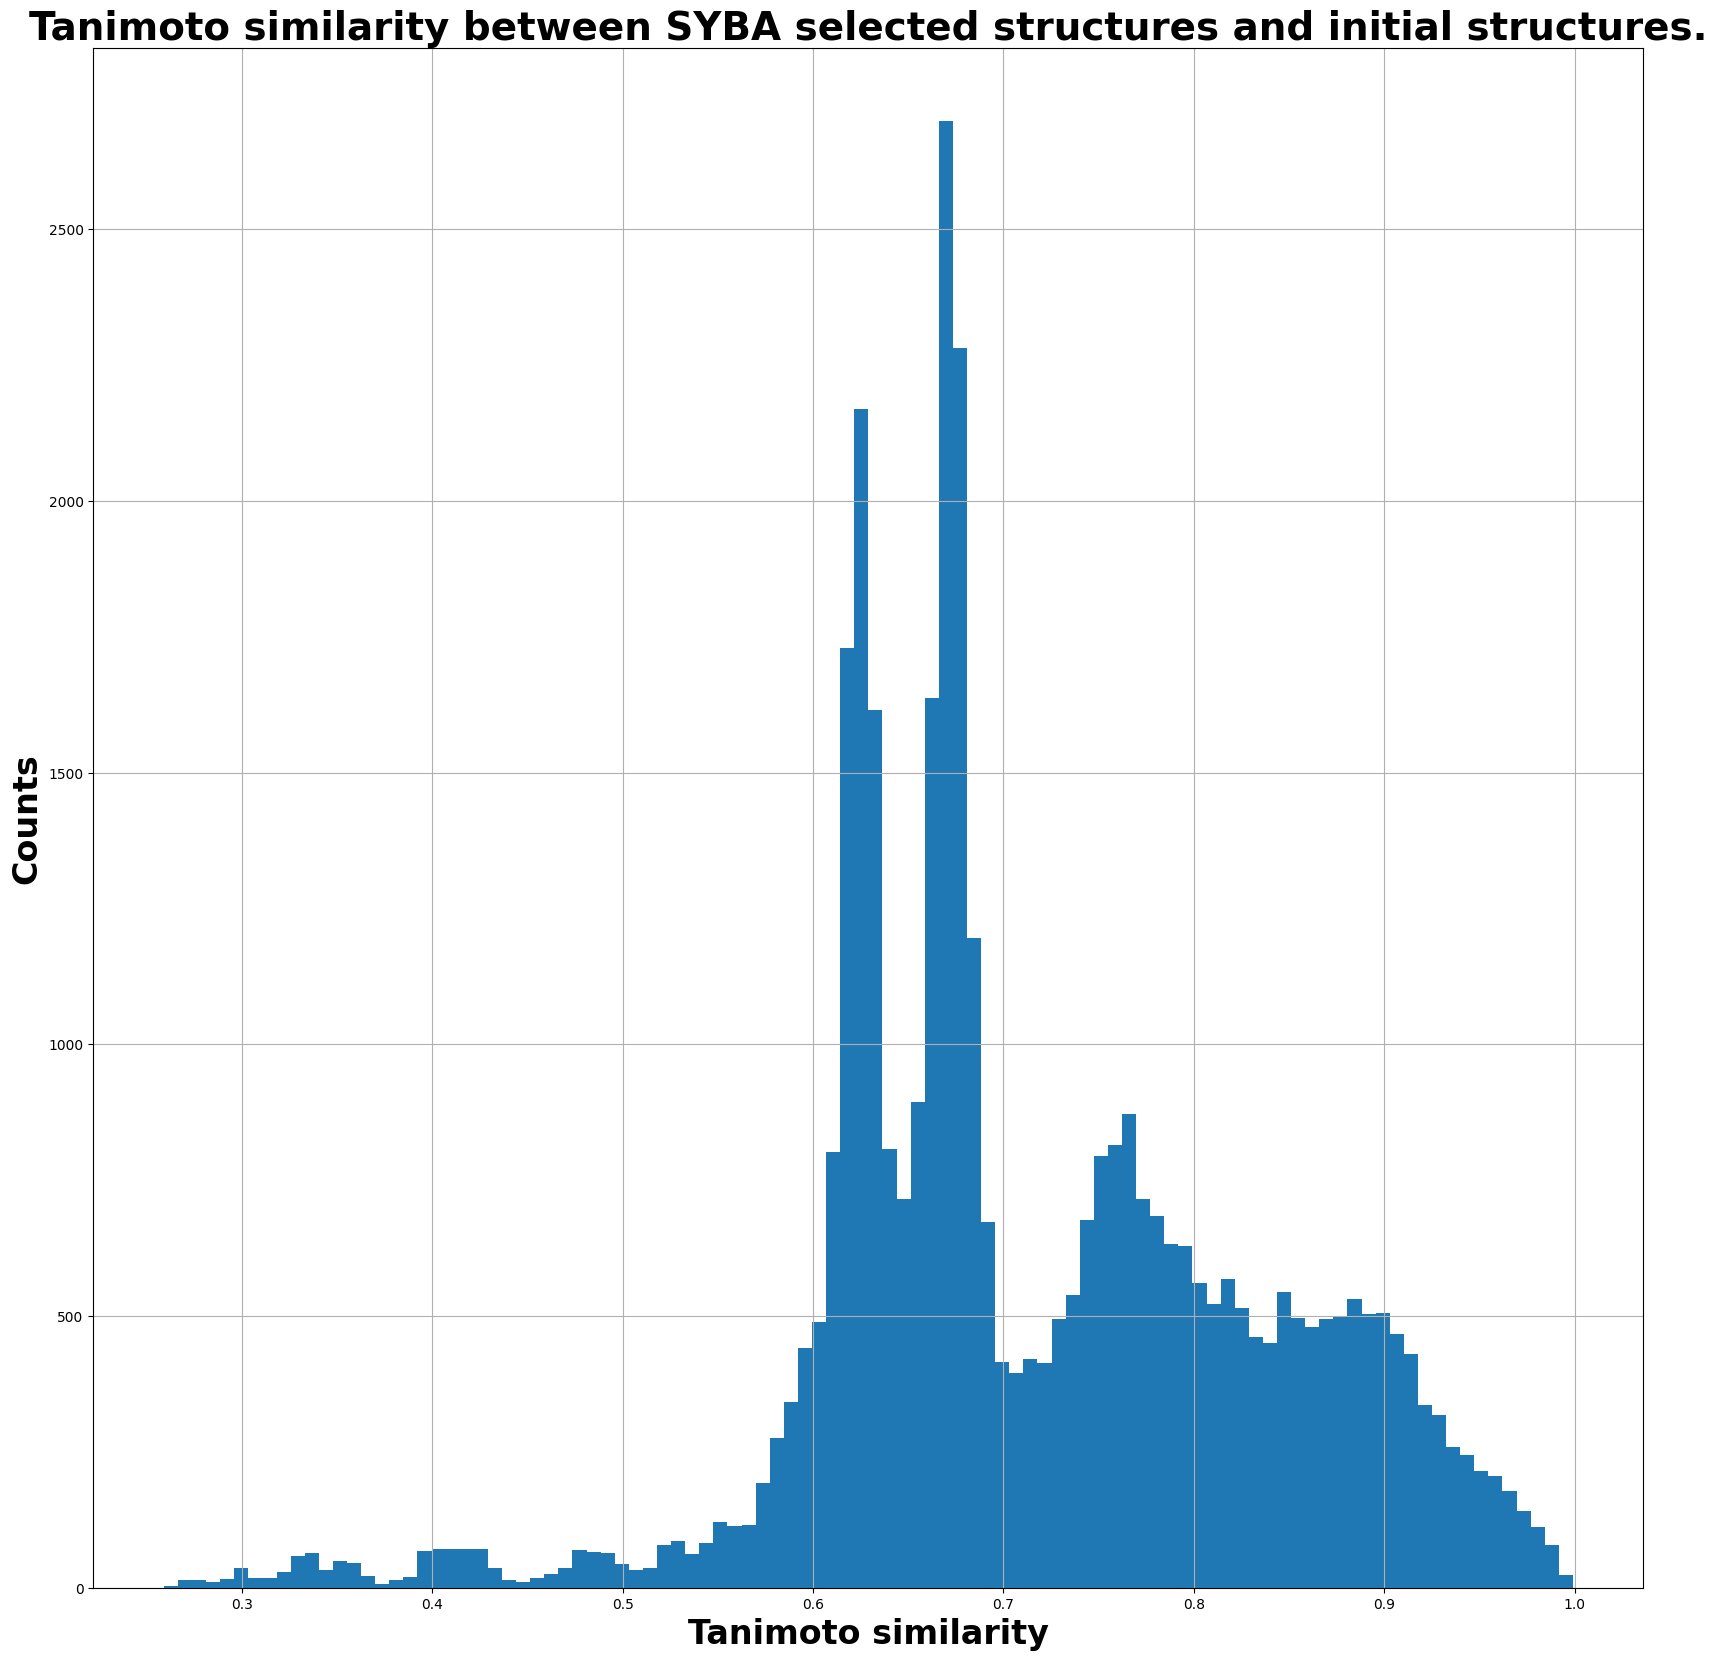

In [21]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc, bins=100)
plt.title('Tanimoto similarity between SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

In [22]:
gbna = total_hist[total_hist['All similarities'] > 0.99]
gbna

,All similarities
612,0.993151
658,0.993151
826,0.991482
838,0.992327
1496,0.994037
1831,0.996593
2221,0.993220
2501,0.990709
2891,0.994068
3226,0.994068


In [23]:
gbn = total_hist[total_hist['All similarities'] > 0.5]

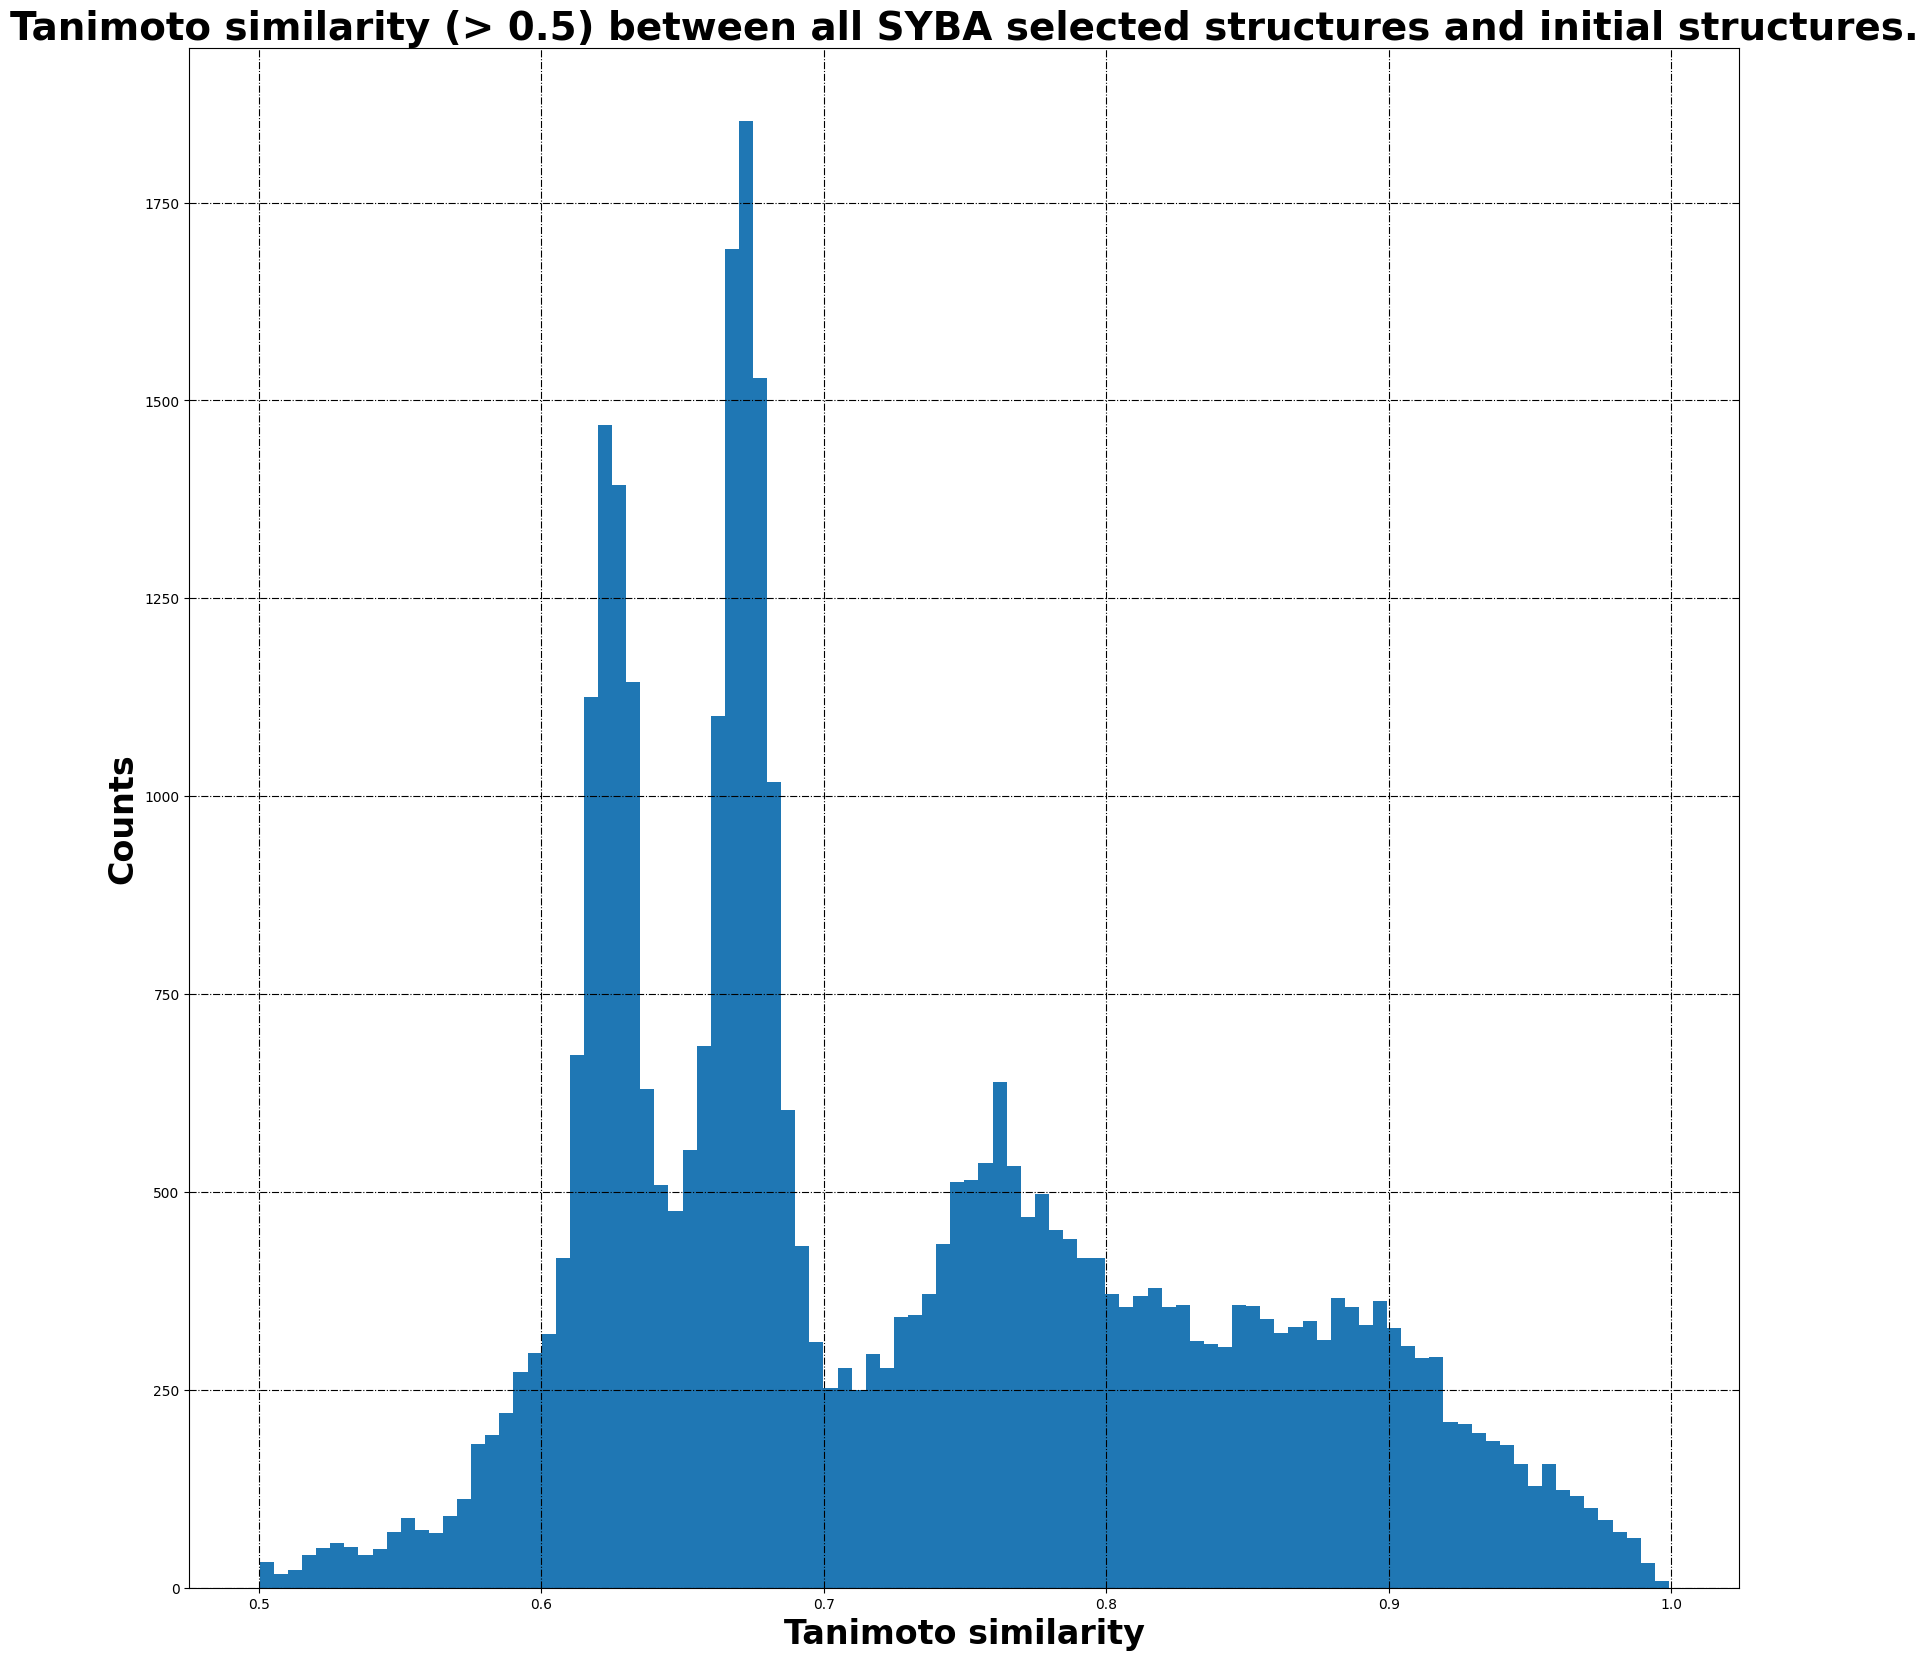

In [24]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(gbn, bins=100)
plt.title('Tanimoto similarity (> 0.5) between all SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

In [25]:
len(gbn)

38339

In [26]:
all_gen = pd.read_excel('../Data/Proposed_structures_with_AI_colchicyne_tanimoto_similarity_.xlsx')

In [27]:
all_gen = all_gen['AI_generated_SMILES']

In [28]:
finger_ini, finger_new_all = prepare_fingerprints(initial, all_gen)

In [29]:
final_list___ = initial.copy()
for i, element in enumerate(finger_ini):
    final_list___[i] = calculate_similarity(element, finger_new_all)

In [30]:
len(final_list___[0])

1356

In [31]:
xc__ = []
for i in range(len(finger_ini)):
    xc__.extend(final_list___[i])

In [32]:
len(xc__)

160008

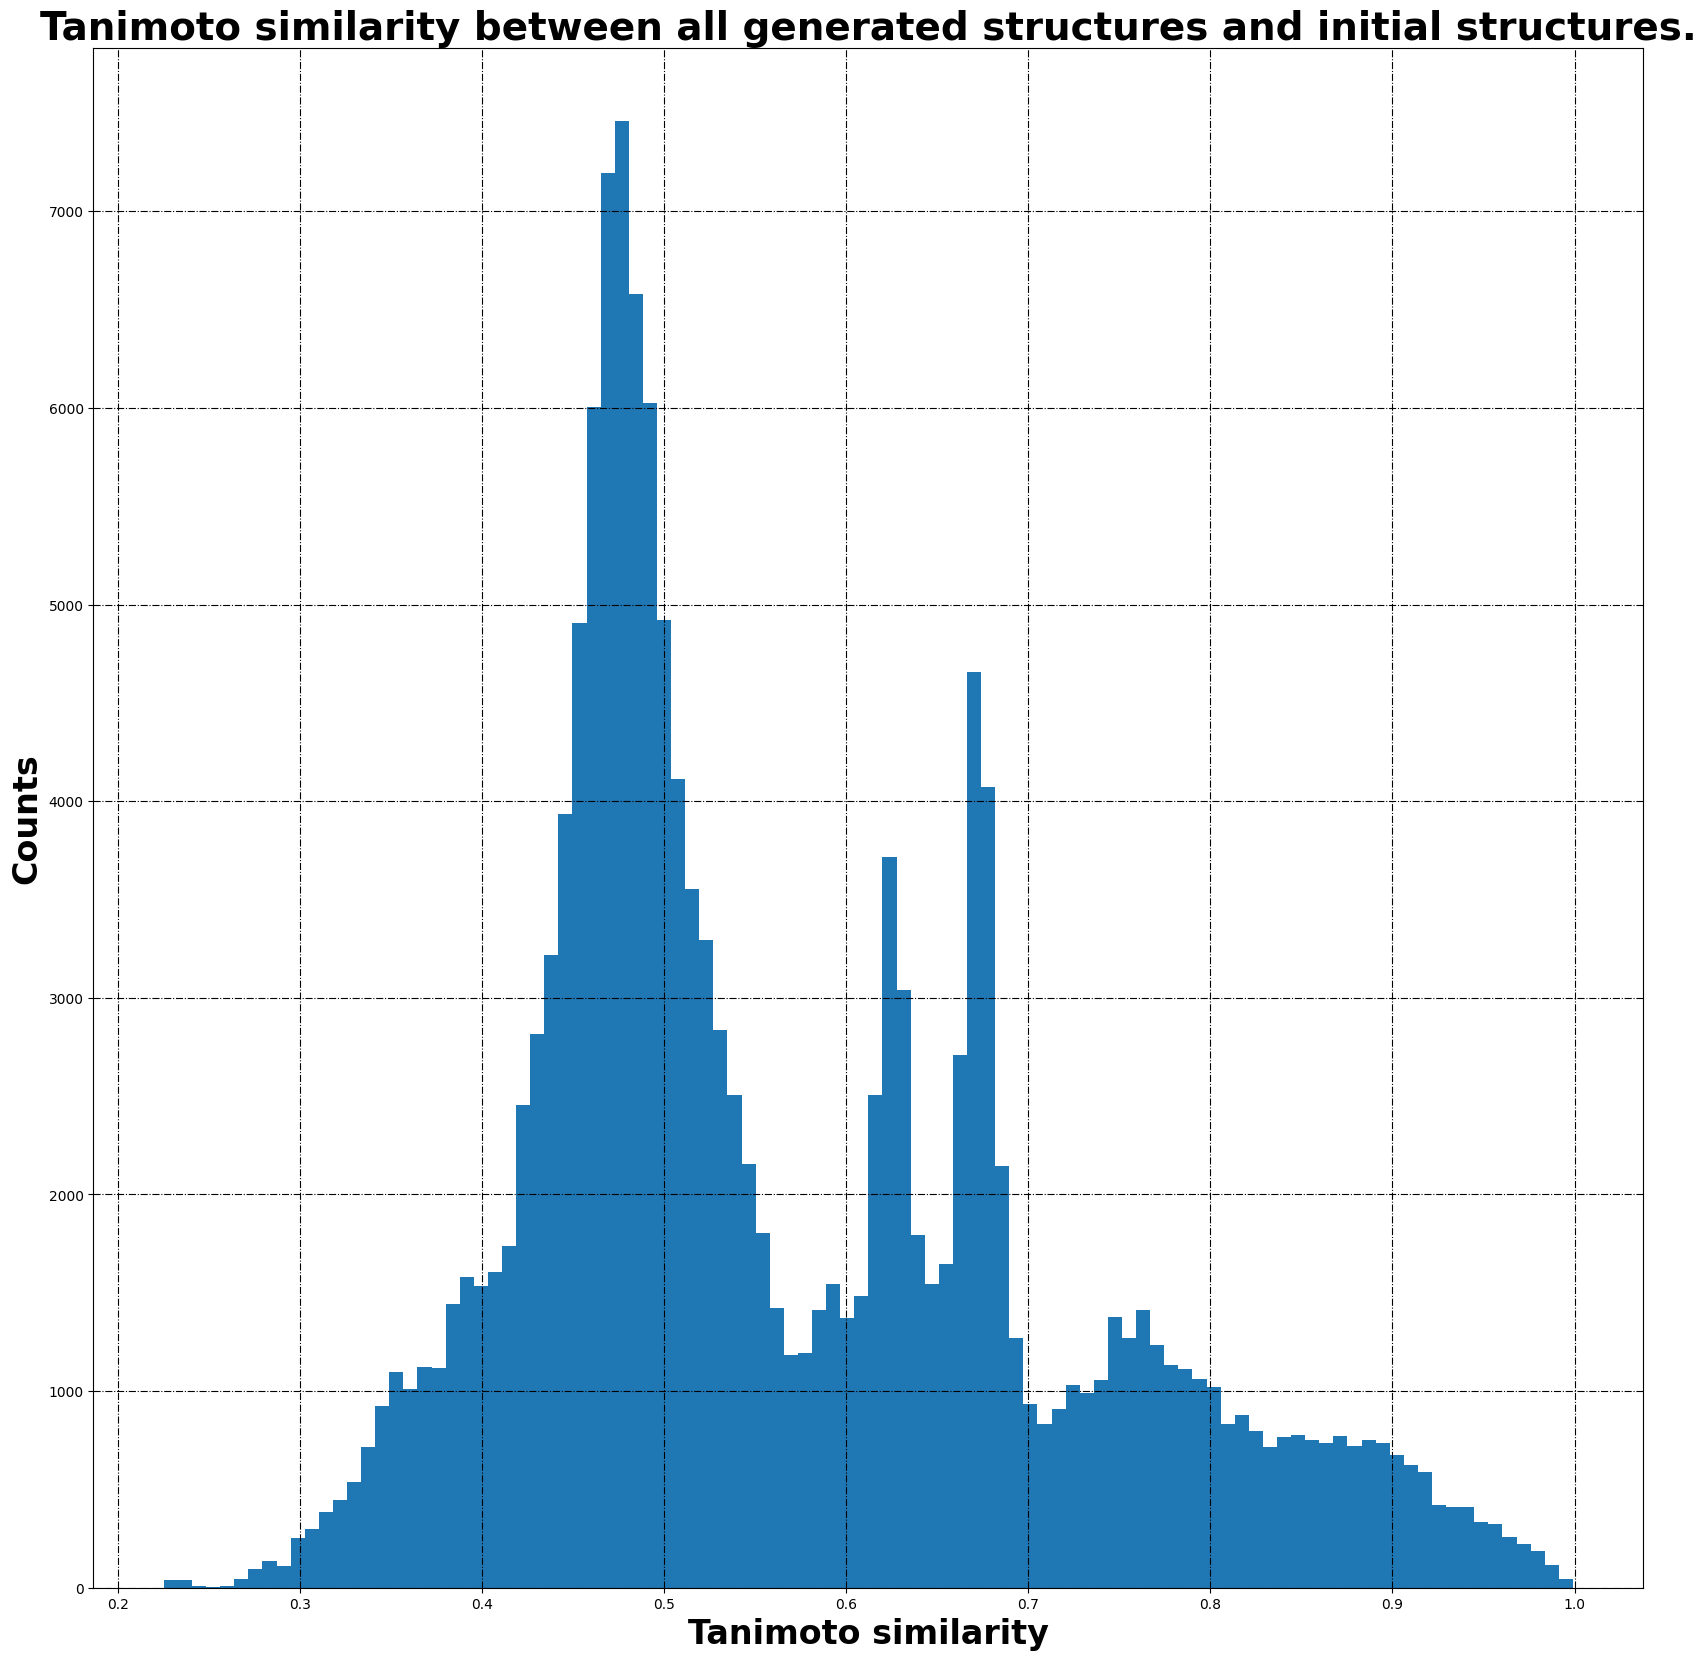

In [33]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc__, bins=100)
plt.title('Tanimoto similarity between all generated structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

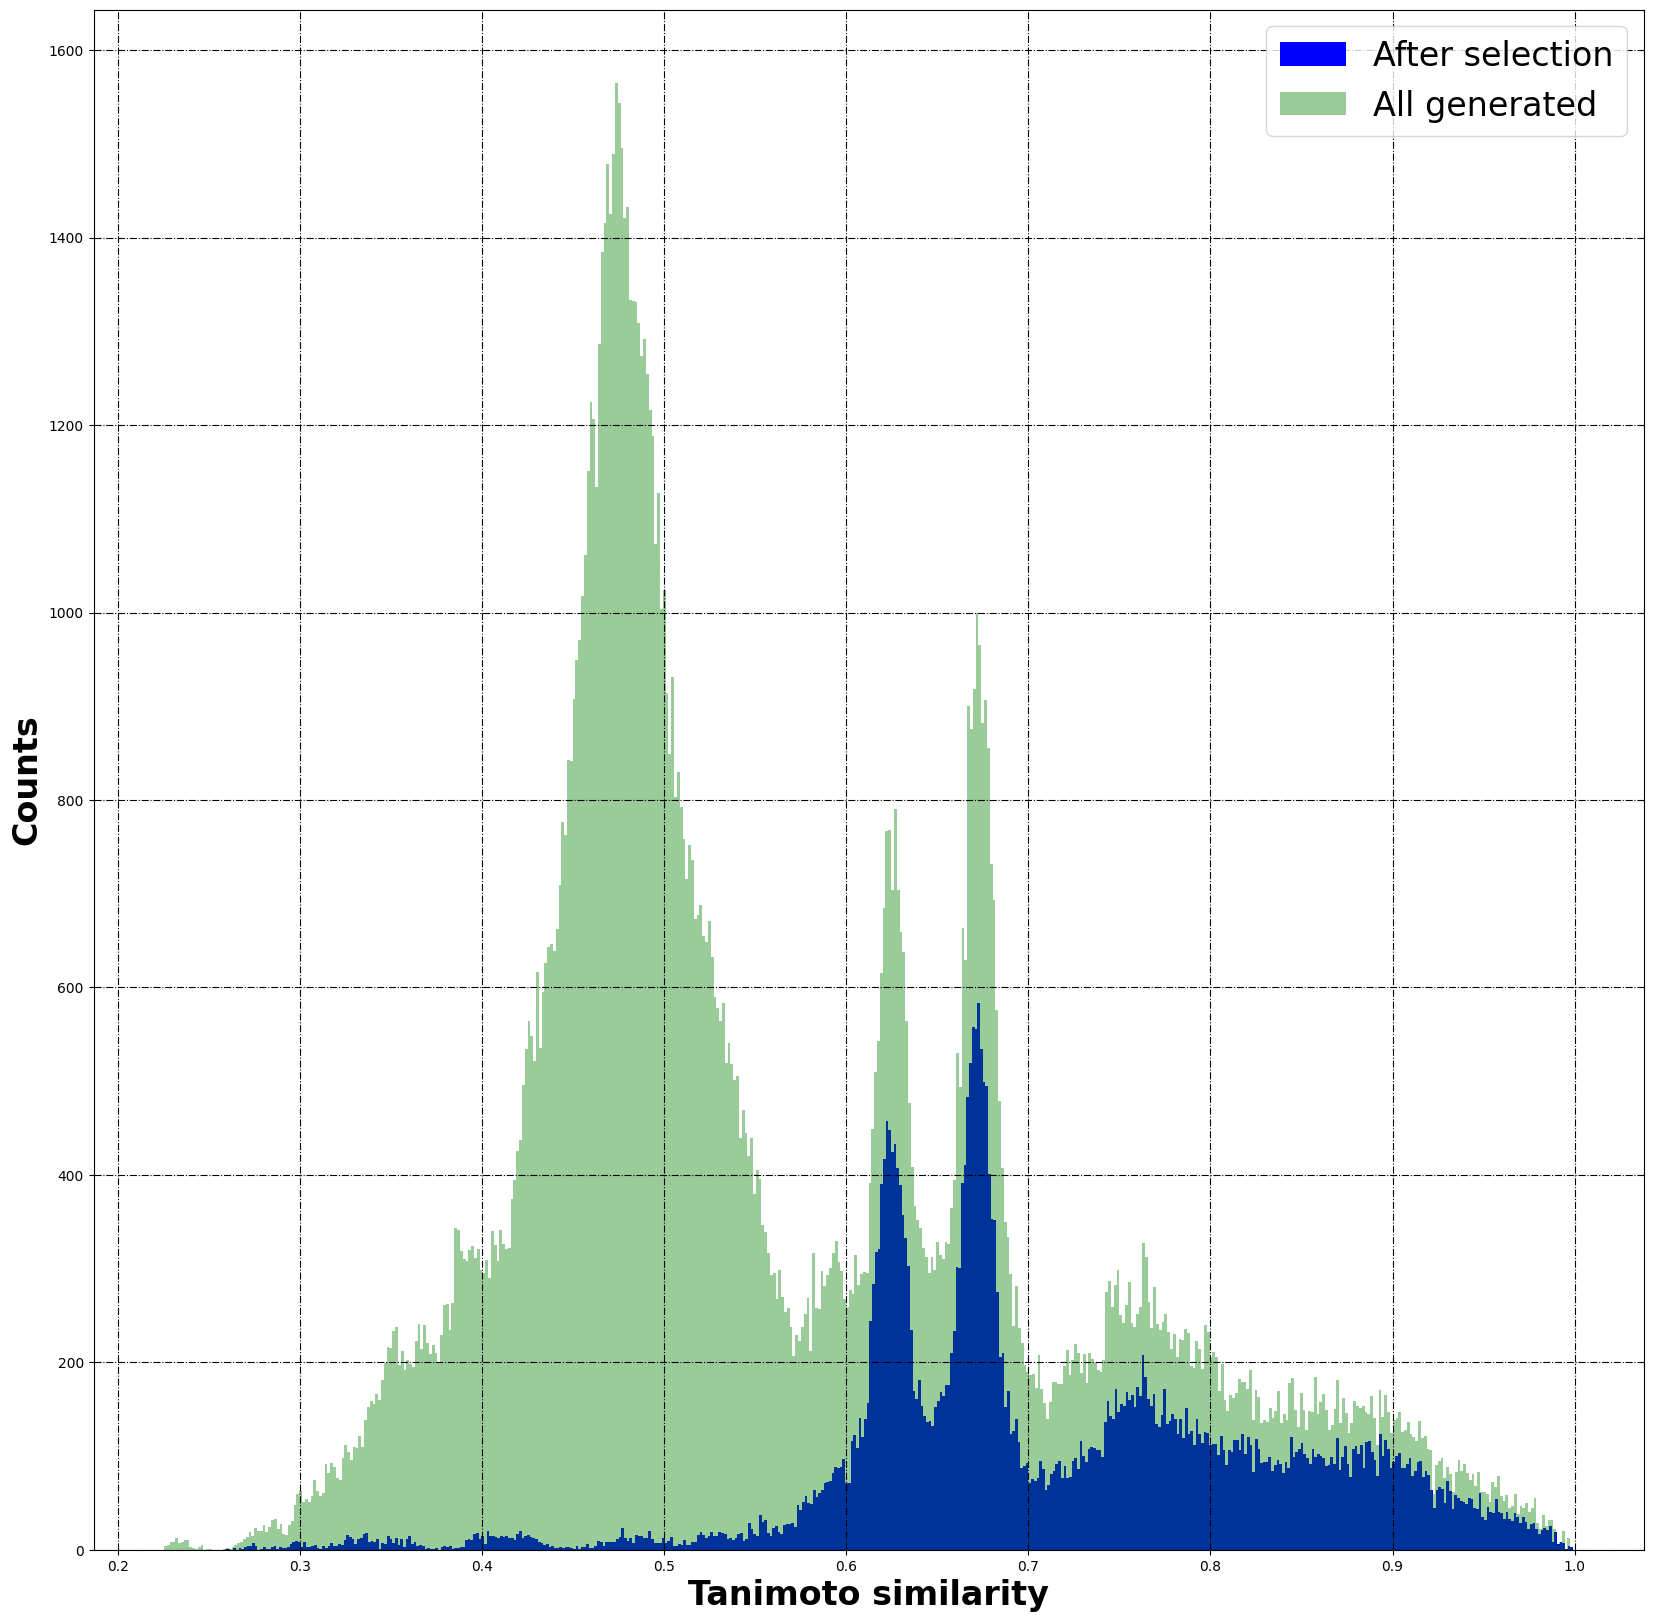

In [37]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(xc, bins=500, alpha=1, color='b', label='After selection')
plt.hist(xc__, bins=500, alpha=0.4, color='g', label='All generated')
#plt.title('Tanimoto similarity between all generated structures, SYBA selected structures and initial structures.', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.legend(fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.savefig('Tanimoto_similarity.pdf', bbox_inches='tight')
plt.show()